<a href="https://colab.research.google.com/github/Folasewa/Personal_ML_Projects/blob/main/Depression_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#@title Import Necessary Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#@title Load the dataset
raw_data = pd.read_csv('scores.csv')

In [5]:
#@title View the first five rows
raw_data.head(5)

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0


In [6]:
#@title Check for missing values

raw_data.isnull().sum()

,0
number,0
days,0
gender,0
age,0
afftype,32
melanch,35
inpatient,32
edu,2
marriage,32
work,32


In [7]:
raw_data.shape

(55, 12)

In [8]:
raw_data.describe()

,days,gender,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
count,55.000000,55.000000,23.000000,20.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,12.600000,1.454545,1.739130,1.950000,1.782609,1.521739,1.869565,22.739130,20.000000
std,2.491467,0.502519,0.540824,0.223607,0.421741,0.510754,0.344350,4.797892,4.729021
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,11.000000
25%,13.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,18.500000,16.000000
50%,13.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,24.000000,21.000000
75%,13.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,26.000000,24.500000
max,20.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,29.000000,28.000000


In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     55 non-null     object 
 1   days       55 non-null     int64  
 2   gender     55 non-null     int64  
 3   age        55 non-null     object 
 4   afftype    23 non-null     float64
 5   melanch    20 non-null     float64
 6   inpatient  23 non-null     float64
 7   edu        53 non-null     object 
 8   marriage   23 non-null     float64
 9   work       23 non-null     float64
 10  madrs1     23 non-null     float64
 11  madrs2     23 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5.3+ KB


In [10]:
#@title Fill Missing Values
mode_value_aff = raw_data['afftype'].mode()[0]
raw_data['afftype'].fillna(mode_value_aff, inplace = True)
mode_value_mel = raw_data['melanch'].mode()[0]
raw_data['melanch'].fillna(mode_value_mel, inplace= True)
mode_value_in = raw_data['inpatient'].mode()[0]
raw_data['inpatient'].fillna(mode_value_in, inplace = True)
mode_value_mar = raw_data['marriage'].mode()[0]
raw_data['marriage'].fillna(mode_value_mar, inplace = True)
mode_value_wor = raw_data['work'].mode()[0]
raw_data['work'].fillna(mode_value_wor, inplace = True)
mode_value_edu = raw_data['edu'].mode()[0]
raw_data['edu'].fillna(mode_value_edu, inplace = True)
mean_value_mad1 = raw_data['madrs1'].mean()
raw_data['madrs1'].fillna(mean_value_mad1, inplace = True)
mean_value_mad2 = raw_data['madrs2'].mean()
raw_data['madrs2'].fillna(mean_value_mad2, inplace = True)

<ipython-input-10-e08123ba1553>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data['afftype'].fillna(mode_value_aff, inplace = True)
<ipython-input-10-e08123ba1553>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [11]:
raw_data.isnull().sum()

,0
number,0
days,0
gender,0
age,0
afftype,0
melanch,0
inpatient,0
edu,0
marriage,0
work,0


In [12]:
raw_data.tail(5)

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
50,control_28,16,2,45-49,2.0,2.0,2.0,,2.0,2.0,22.73913,20.0
51,control_29,13,2,50-54,2.0,2.0,2.0,,2.0,2.0,22.73913,20.0
52,control_30,9,2,35-39,2.0,2.0,2.0,,2.0,2.0,22.73913,20.0
53,control_31,13,1,20-24,2.0,2.0,2.0,,2.0,2.0,22.73913,20.0
54,control_32,14,2,25-29,2.0,2.0,2.0,,2.0,2.0,22.73913,20.0


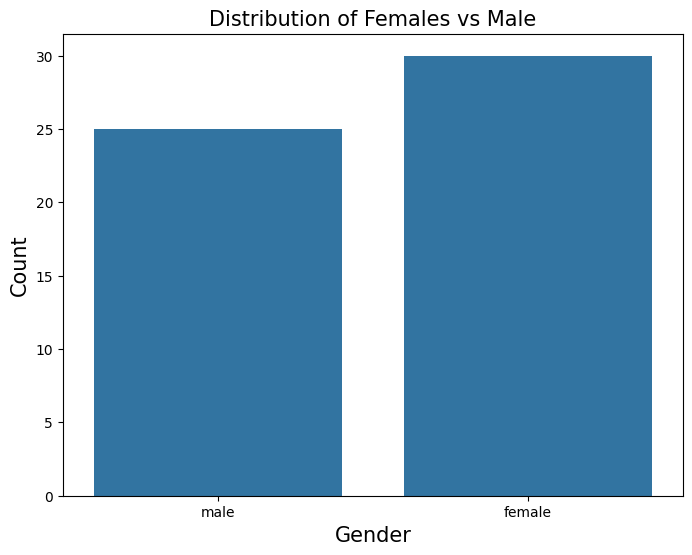

In [13]:
#@title Let's visualize each category within the columns to check the distribution
#for gender
#lets replace 1 for female, 2 for male
raw_data['gender'] = raw_data['gender'].replace({1:'female', 2: 'male'})
plt.figure(figsize = (8,6))
sns.countplot(x = raw_data['gender'], data = raw_data)
plt.title('Distribution of Females vs Male', fontsize = 15)
plt.xlabel('Gender', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

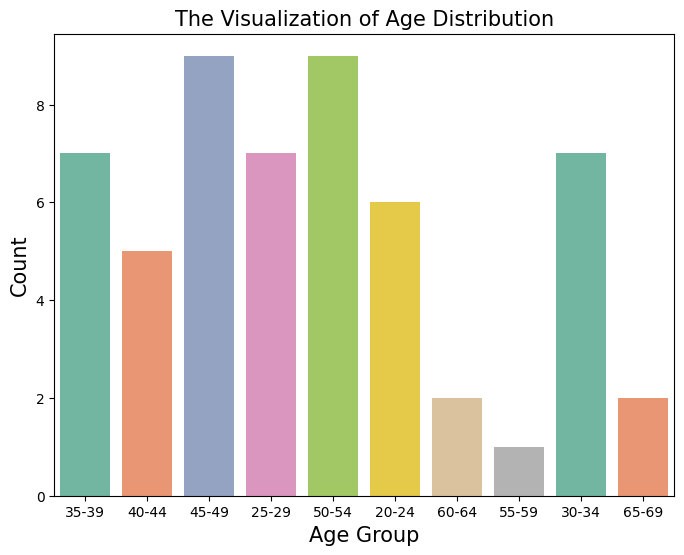

In [14]:
#for age
#age is in range, so let's use barplot
plt.figure(figsize = (8,6))
sns.countplot(x=raw_data['age'], data = raw_data, hue = 'age', legend = False, palette = 'Set2')
plt.title('The Visualization of Age Distribution', fontsize = 15)
plt.xlabel('Age Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

<ipython-input-15-3cf474bfee9f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = raw_data['afftype'], data = raw_data, palette = colours)


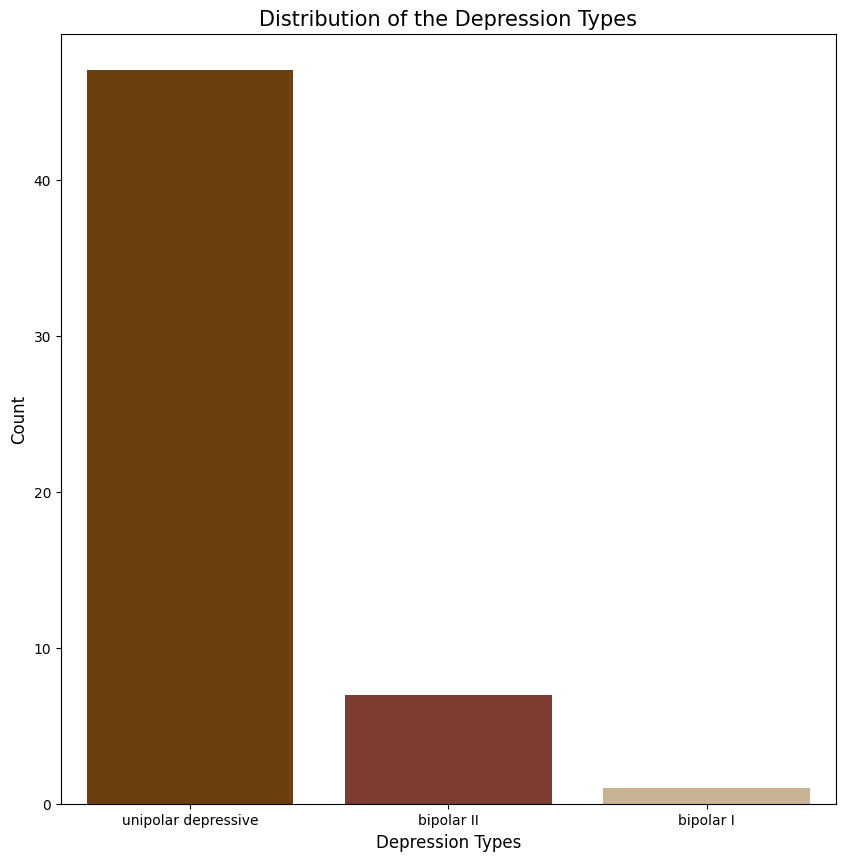

In [15]:
# for afftype 1: bipolar II, 2: unipolar depressive, 3: bipolar I
raw_data['afftype'] = raw_data['afftype'].replace({1: 'bipolar II', 2: 'unipolar depressive', 3: 'bipolar I'})
colours = ['#7B3F00', '#8A3324', '#D2B48C']
plt.figure(figsize = (10, 10))
sns.countplot(x = raw_data['afftype'], data = raw_data, palette = colours)
plt.title('Distribution of the Depression Types', fontsize = 15)
plt.xlabel('Depression Types', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

In [16]:
raw_data.head(5)

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,male,35-39,unipolar depressive,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,male,40-44,bipolar II,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,female,45-49,unipolar depressive,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,male,25-29,unipolar depressive,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,male,50-54,unipolar depressive,2.0,2.0,11-15,2.0,2.0,26.0,26.0


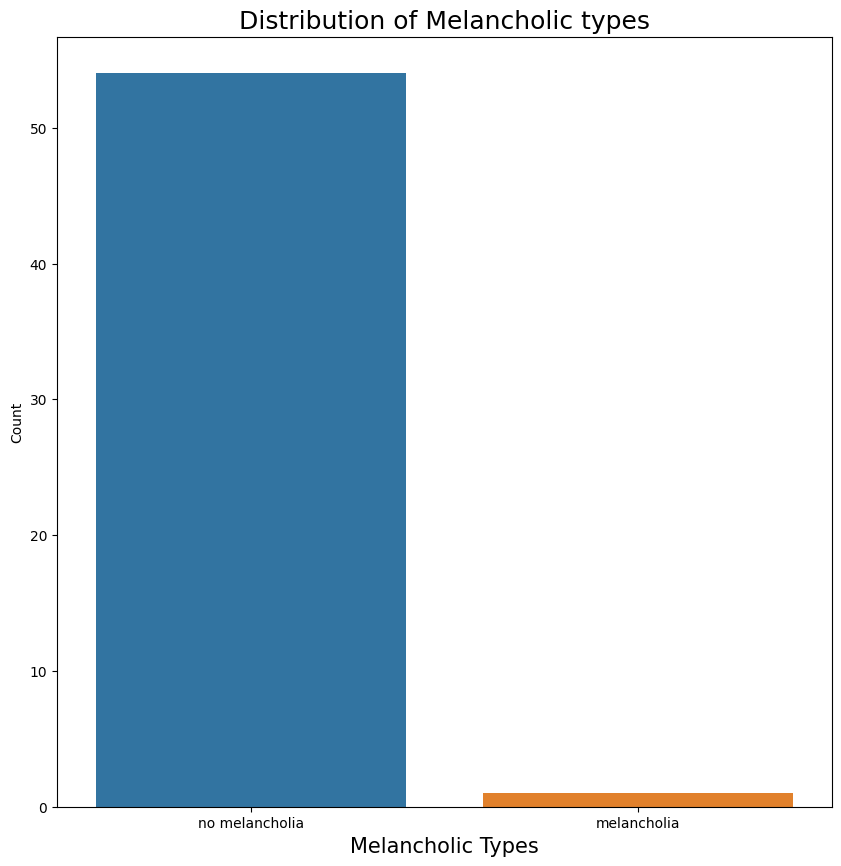

In [17]:

#for melancholic
raw_data['melanch'] = raw_data['melanch'].replace({1: 'melancholia', 2: 'no melancholia'})
plt.figure(figsize = (10,10))
sns.countplot(x = raw_data['melanch'], data = raw_data, hue = 'melanch', legend=False)
plt.title('Distribution of Melancholic types', fontsize = 18)
plt.xlabel('Melancholic Types', fontsize = 15)
plt.ylabel('Count')
plt.show()

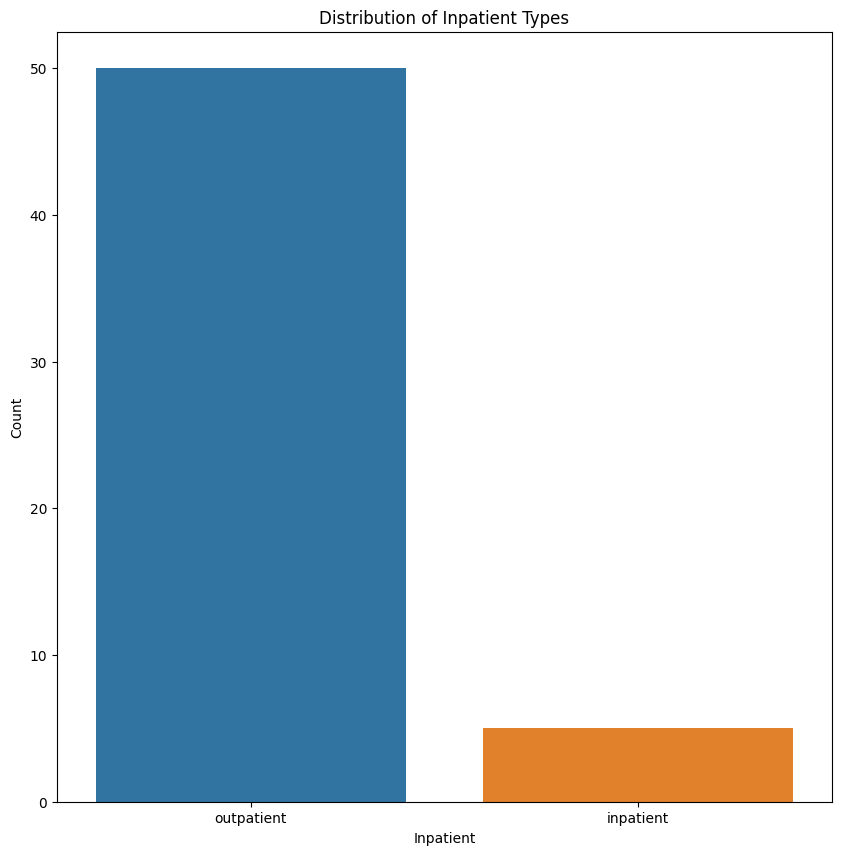

In [18]:
#for Inpatient

raw_data['inpatient'] = raw_data['inpatient'].replace({1: 'inpatient', 2: 'outpatient'})
plt.figure(figsize = (10, 10))
sns.countplot(x = raw_data['inpatient'], data = raw_data, hue = 'inpatient', legend = False)
plt.title ('Distribution of Inpatient Types')
plt.xlabel('Inpatient')
plt.ylabel('Count')
plt.show()

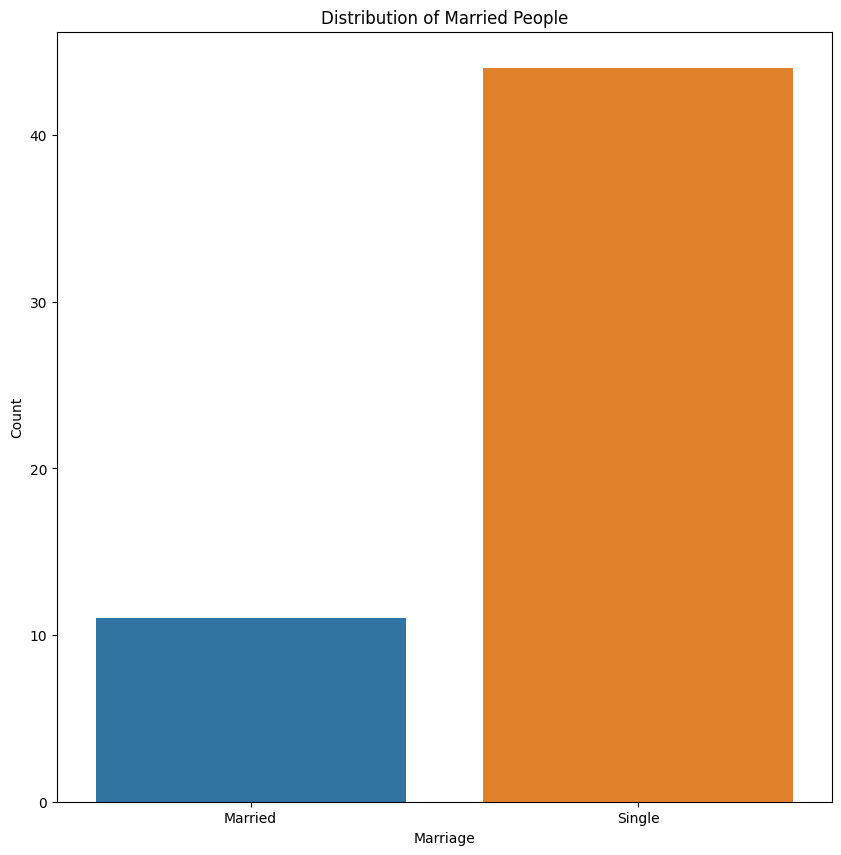

In [19]:
#marriage (1: married or cohabiting, 2: single),
raw_data['marriage'] = raw_data['marriage'].replace({1:'Married', 2:'Single'})
plt.figure(figsize = (10,10))
sns.countplot(x = raw_data['marriage'], data = raw_data, hue = 'marriage', legend = False)
plt.title('Distribution of Married People')
plt.xlabel('Marriage')
plt.ylabel('Count')
plt.show()



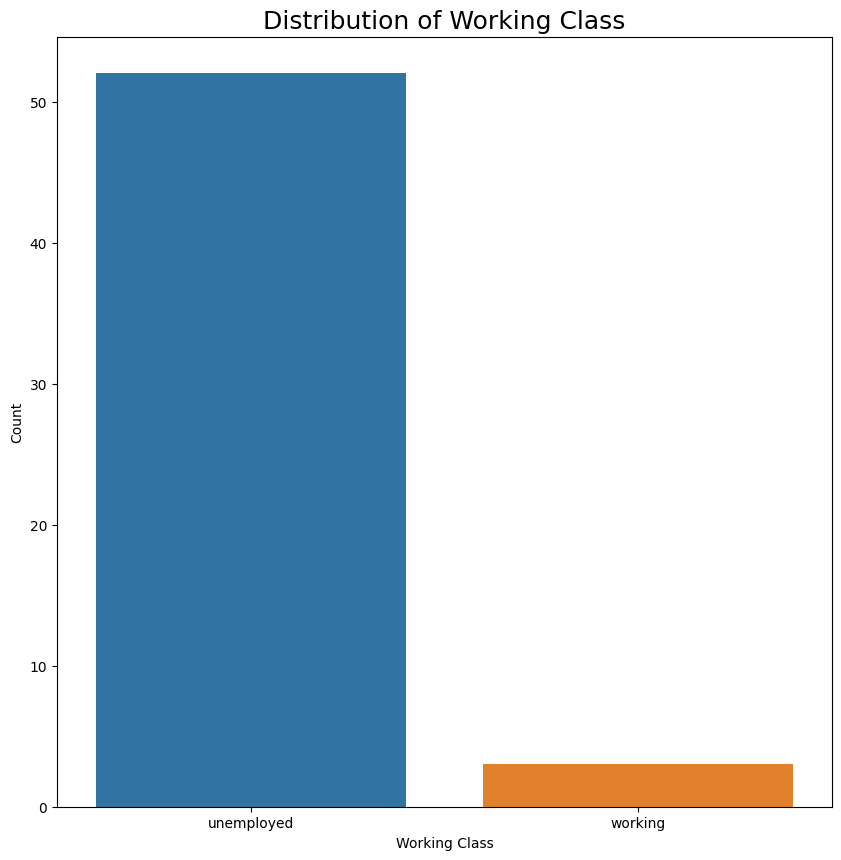

In [20]:
#work (1: working or studying, 2: unemployed/sick leave/pension)
raw_data['work'] = raw_data['work'].replace({1:'working', 2:'unemployed'})
plt.figure(figsize = (10,10))
sns.countplot(x = raw_data['work'], data = raw_data, hue = 'work', legend = False)
plt.title('Distribution of Working Class', fontsize = 18)
plt.xlabel('Working Class')
plt.ylabel('Count')
plt.show()

In [21]:
raw_data.head(5)

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,male,35-39,unipolar depressive,no melancholia,outpatient,6-10,Married,unemployed,19.0,19.0
1,condition_2,18,male,40-44,bipolar II,no melancholia,outpatient,6-10,Single,unemployed,24.0,11.0
2,condition_3,13,female,45-49,unipolar depressive,no melancholia,outpatient,6-10,Single,unemployed,24.0,25.0
3,condition_4,13,male,25-29,unipolar depressive,no melancholia,outpatient,11-15,Married,working,20.0,16.0
4,condition_5,13,male,50-54,unipolar depressive,no melancholia,outpatient,11-15,Single,unemployed,26.0,26.0


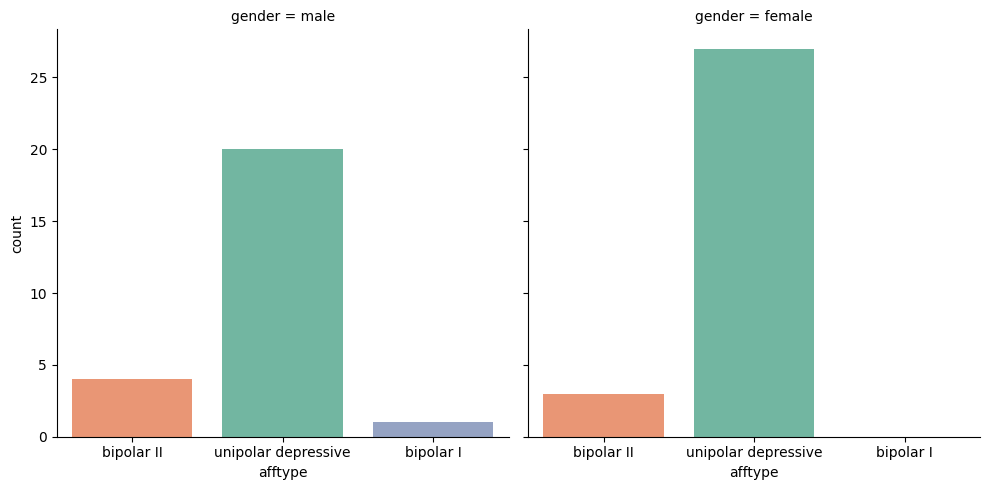

In [22]:
#@title Using FacetGrid to Compare each gender against the depressive types
#gender vs afftype

gend_aff = sns.FacetGrid(raw_data, col="gender", height=5)
gend_aff.map(sns.countplot, 'afftype', order=['bipolar II', 'unipolar depressive', 'bipolar I'], hue = raw_data['afftype'], legend = False, palette='Set2')

plt.show()


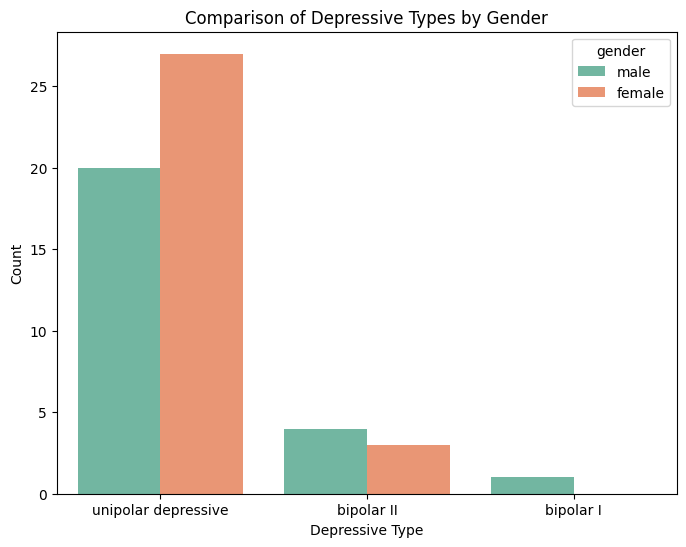

In [23]:
#@title Using Countplot for gender vs depressive type
plt.figure(figsize=(8, 6))
sns.countplot(data=raw_data, x='afftype', hue='gender',legend = True, palette='Set2')

plt.title('Comparison of Depressive Types by Gender')
plt.xlabel('Depressive Type')
plt.ylabel('Count')

plt.show()


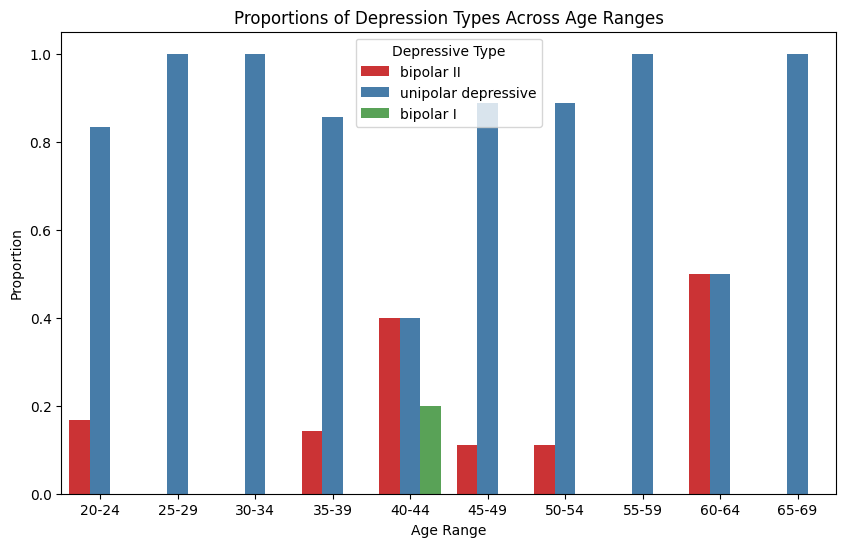

In [28]:
#@title Emphasizing the proportion of each depression type within the age group


# Calculate proportions manually for each age range and depression type
age_depression_counts = raw_data.groupby(['age', 'afftype']).size().reset_index(name='count')

# Normalize the counts within each 'age_range' to get proportions
age_depression_counts['proportion'] = age_depression_counts.groupby('age')['count'].transform(lambda x: x / x.sum())

# Plot proportions as a barplot
plt.figure(figsize=(10, 6))

sns_plot = sns.barplot(
    data=age_depression_counts,
    x='age',
    y='proportion',
    hue='afftype',
    palette='Set1'
)

# Customize the plot
plt.title('Proportions of Depression Types Across Age Ranges')
plt.xlabel('Age Range')
plt.ylabel('Proportion')

# Add the legend (optional)
plt.legend(title='Depressive Type')

# Show the plot
plt.show()

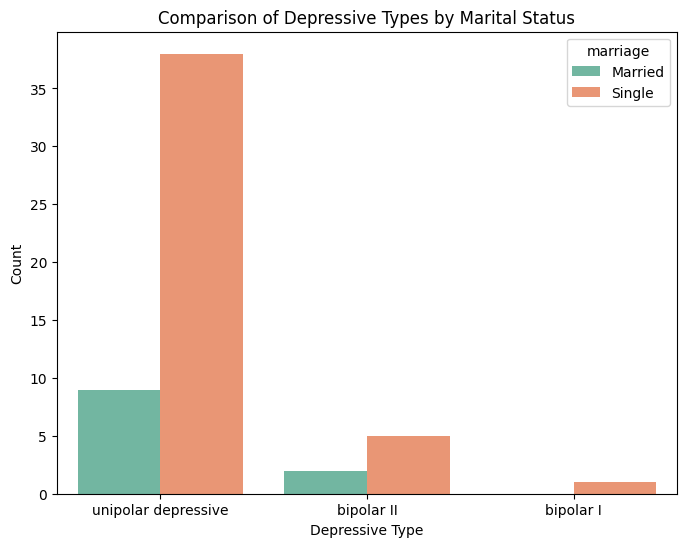

In [29]:
#@title Using Countplot for Marital Status vs Depression type
plt.figure(figsize=(8, 6))
sns.countplot(data=raw_data, x='afftype', hue='marriage',legend = True, palette='Set2')

plt.title('Comparison of Depressive Types by Marital Status')
plt.xlabel('Depressive Type')
plt.ylabel('Count')

plt.show()


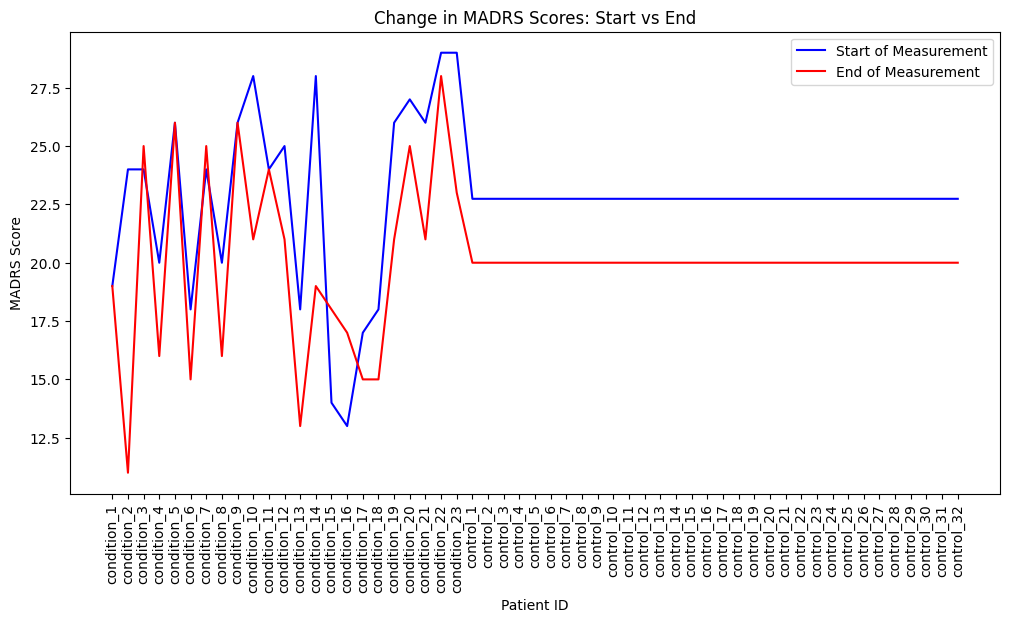

In [31]:
#@title Line Plot of Madrs before and after of each patient
plt.figure(figsize=(12, 6))
sns.lineplot(x='number', y='madrs1', data=raw_data, label='Start of Measurement', color='blue')
sns.lineplot(x='number', y='madrs2', data=raw_data, label='End of Measurement', color='red')
plt.title('Change in MADRS Scores: Start vs End')
plt.xlabel('Patient ID')
plt.ylabel('MADRS Score')
plt.xticks(rotation=90)
plt.legend()
plt.show()

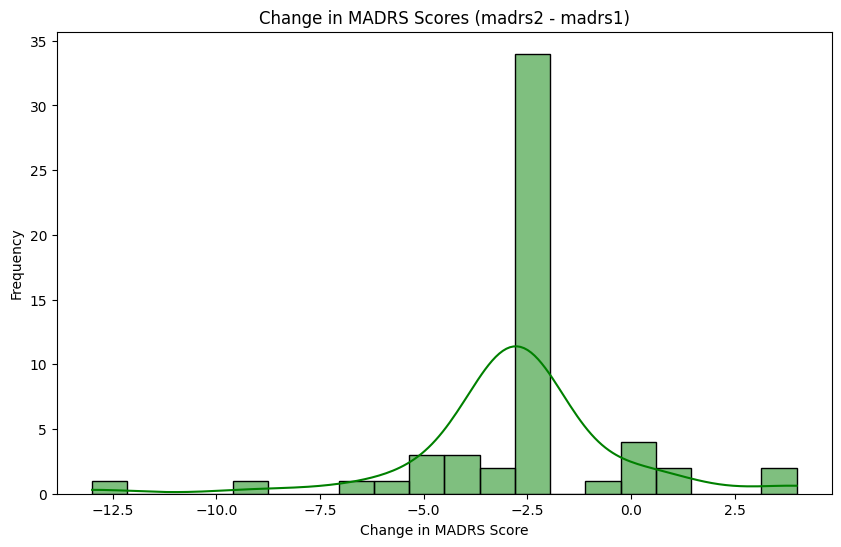

In [32]:
#@title Change in Montgomery-Asberg Depression Rating Scale (MADRS)

raw_data['madrs_change'] = raw_data['madrs2'] - raw_data['madrs1']

plt.figure(figsize=(10, 6))
sns.histplot(raw_data['madrs_change'], kde=True, color='green', bins=20)
plt.title('Change in MADRS Scores (madrs2 - madrs1)')
plt.xlabel('Change in MADRS Score')
plt.ylabel('Frequency')
plt.show()

In [33]:
#@title Change in MADRS for each patient

!pip install plotly

import plotly.express as px

# Assuming df is your dataframe and you have columns 'patient_id', 'madrs_change'
fig = px.scatter(
    raw_data,
    x='number',  # X-axis: Patient ID
    y='madrs_change',  # Y-axis: MADRS Change
    title='MADRS Change per Patient',  # Title of the plot
    labels={'patient_id': 'Patient ID', 'madrs_change': 'Change in MADRS Score'},  # Axis labels
    hover_data=['number', 'madrs_change'],  # Columns to display when hovering
)

# Show the interactive plot
fig.show()


In [34]:
#Let's update the above code to include the category these madrs score change belong to
# Step 1: Create a new column to categorize the MADRS change
def categorize_madrs(madrs_score):
    if madrs_score > 30:
        return 'Severe Depression'
    elif madrs_score < 10:
        return 'Healthy'
    else:
        return 'Moderate Depression'

raw_data['madrs_category'] = raw_data['madrs_change'].apply(categorize_madrs)

# Step 2: Create the interactive scatter plot with categories
fig = px.scatter(
    raw_data,
    x='number',
    y='madrs_change',
    color='madrs_category',
    color_discrete_map={'Severe Depression': 'red', 'Healthy': 'green', 'Moderate Depression': 'orange'},
    title='MADRS Change per Patient by Category',
    labels={'patient_id': 'Patient ID', 'madrs_change': 'Change in MADRS Score'},
    hover_data=['number', 'madrs_change', 'madrs_category'],
)
fig.show()

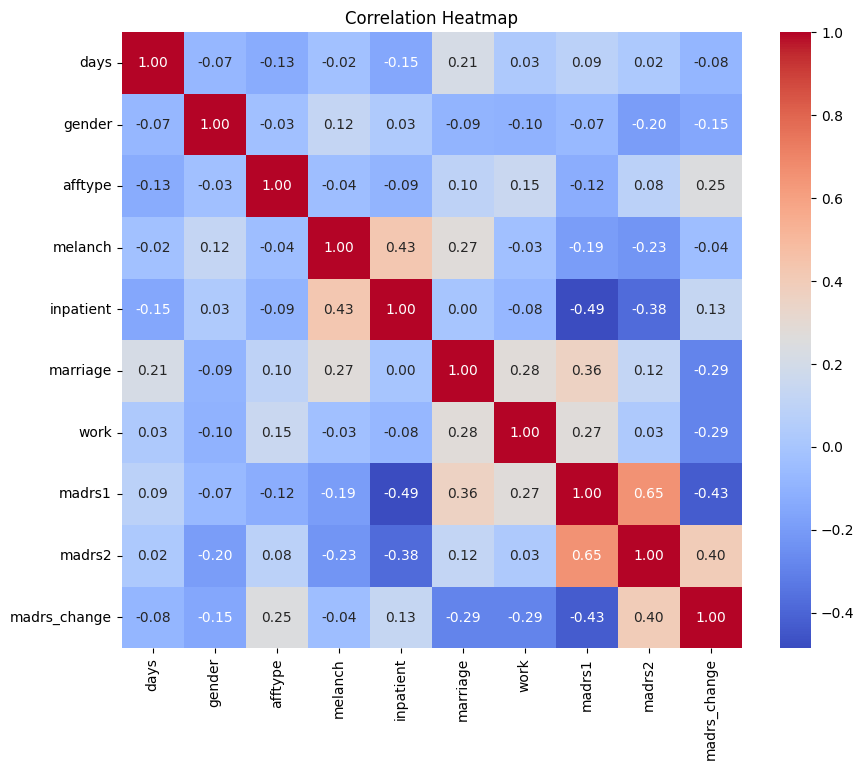

In [37]:
#degree of correlation among the indicators
# Calculate correlation matrix

#encoding the features back to numerical to get the correlation
raw_data['gender'] = raw_data['gender'].replace({'female':1, 'male': 2})
raw_data['afftype'] = raw_data['afftype'].replace({'bipolar II': 1, 'unipolar depressive':2, 'bipolar I': 3})
raw_data['melanch'] = raw_data['melanch'].replace({'melancholia': 1, 'no melancholia': 2})
raw_data['inpatient'] = raw_data['inpatient'].replace({'inpatient': 1, 'outpatient': 2})
raw_data['marriage'] = raw_data['marriage'].replace({'Married': 1, 'Single': 2})
raw_data['work'] = raw_data['work'].replace({'working': 1, 'unemployed': 2})



correlation_matrix = raw_data.corr(numeric_only = True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()